In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Examine the Dataset

In [3]:
digit_set = load_digits()

Text(0.5, 1.0, 'Label: 4')

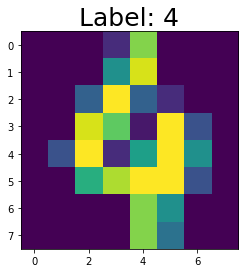

In [20]:
plt.imshow(np.reshape(digit_set.images[100], (8,8)))
plt.title(f"Label: {digit_set.target[100]}", fontsize=25)

### Split the training data
We are reserving 25% of the images for test data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(digit_set.data, digit_set.target, test_size=0.25)

## Evaluation Function

In [46]:
def evaluate(y_true, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    accuracy = metrics.accuracy_score(y_true, y_pred)
    recall_macro = metrics.recall_score(y_true, y_pred, average='macro')
    return accuracy, recall_macro, confusion_matrix

## KNeighbors Classifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_accuracy, knn_recall, knn_confusion_matrix = evaluate(y_test, y_pred_knn)

In [51]:
print(f"KNN Accuracy: {knn_accuracy} Recall: {knn_recall}")

KNN Accuracy: 0.9733333333333334 Recall: 0.9740437695815567 Recall(micro): 0.9733333333333334


## SGD Classifier

In [53]:
sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)
sgd_accuracy, sgd_recall_macro, sgd_recall_micro, sgd_confusion_matrix = evaluate(y_test, y_pred_sgd)

In [54]:
print(f"SGD Accuracy: {sgd_accuracy} Recall: {sgd_recall_macro} Recall(micro): {sgd_recall_micro}")

SGD Accuracy: 0.9622222222222222 Recall: 0.9635603205537382 Recall(micro): 0.9622222222222222
